## Sales Channel Prediction Case Study  

#### Problem Statement:

#### When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . The distribution strategy and the channel design have to be right the first time.

#### The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

#### We have to predict the total sales generated from advertising channels : TV, radio and newspaper

The dataset is 'Advertising.csv'


In [1]:
#Loading the dataset
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Advertising.csv')
#Since the index number is provided as column, we are changing the default index with the first column and renaming it as 'Sl.No.'
data.columns.values[0] = 'Sl.No.'     
data.set_index(data.columns[0],inplace = True)
data.head(10)

,TV,radio,newspaper,sales
Sl.No.,,,,
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8


In [2]:
data.shape

(200, 4)

There are 200 rows and 5 columns(including the index column) in the dataset. We can ignore the index column since it is just to  indicating place in rows and used as a means of identification. 

In [3]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

Type of data in each columns

In [4]:
data.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

All the columns including the target column is in float type. So we will consider this as a regression type of problem and use regression methods to attain our output.

### Features in Dataset(Independent Variable)

1. TV - This includes the data of sales generated from advertisement on TV as a channel.
2. radio - This includes the data of sale generated from advertisements through radio.
3. newspaper - This includes the data of sales generated from advertisements on Newspapers as a channel.

### Target in Dataset(Dependent Variable)

sales - This column included the total sales generated from advertisements through TV, radio and newspaper. The data is continuous type.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


We are only having float type of data in all columns. There is 200 non null values in all four columns.

### Checking for Missing Values

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


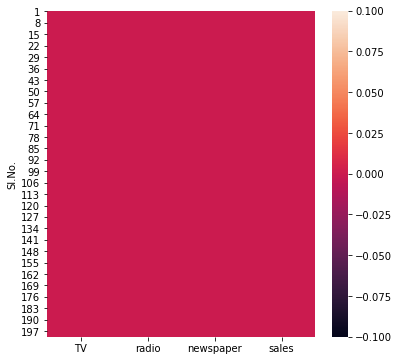

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[6,6])
sns.heatmap(data.isnull())
print(data.isnull().sum())

We are not having any null values in the dataset.

### Data Visualization

In [7]:
#User defined function to plot the columns in histogram plot.
import numpy as np

def histogramplot(col):
    plt.figure(figsize=[4,4])
    sns.histplot(x =col,data = data,bins =6,kde=True)
    print(np.histogram(data[col],bins=6))

(array([36, 34, 29, 30, 45, 26], dtype=int64), array([  0.7       ,  49.98333333,  99.26666667, 148.55      ,
       197.83333333, 247.11666667, 296.4       ]))


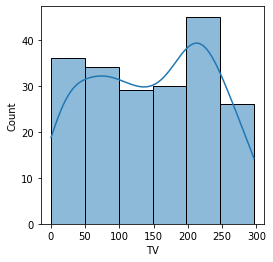

In [8]:
histogramplot('TV')

From the above observation the data in column 'TV' is not normally distributed. Most of the data is lying between the range of 200 and 250.

(array([43, 34, 29, 31, 32, 31], dtype=int64), array([ 0.        ,  8.26666667, 16.53333333, 24.8       , 33.06666667,
       41.33333333, 49.6       ]))


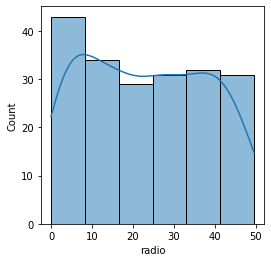

In [9]:
histogramplot('radio')

From the above observation, the data in column 'radio' is not normally distributed. Most of the data is lying betweeen 0 and 20. 

(array([71, 65, 38, 21,  3,  2], dtype=int64), array([  0.3 ,  19.25,  38.2 ,  57.15,  76.1 ,  95.05, 114.  ]))


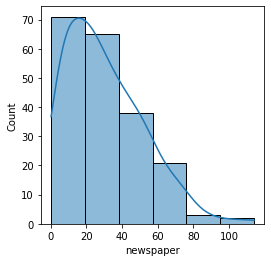

In [10]:
histogramplot('newspaper')

The data in the column 'newspaper' is high between 0 and 40. 

(array([ 8, 37, 68, 45, 29, 13], dtype=int64), array([ 1.6       ,  5.83333333, 10.06666667, 14.3       , 18.53333333,
       22.76666667, 27.        ]))


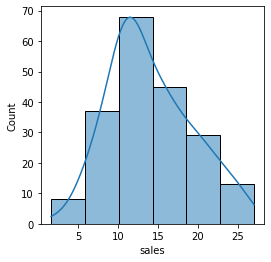

In [11]:
histogramplot('sales')

The data in the target column 'sales' is almost normally distributed. The highest distribution of data is between the range 5-20.

#### Bivariate Analysis

Now we can check the relationship of each dependent column with the target column.

<AxesSubplot:xlabel='TV', ylabel='sales'>

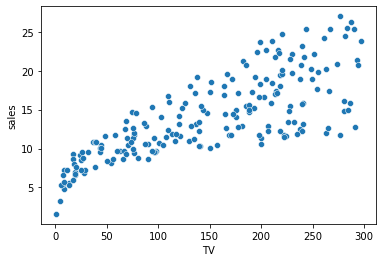

In [12]:
sns.scatterplot('TV','sales',data = data)

The column 'TV' is having a positve relation with the target column. 

<AxesSubplot:xlabel='radio', ylabel='sales'>

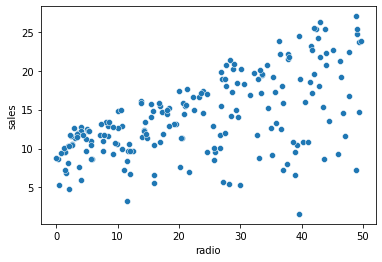

In [13]:
sns.scatterplot('radio','sales',data = data)

The column 'radio' is having positive relation with the target variable, but the data is scattered and not equally distributed.

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

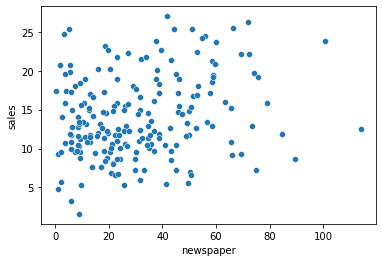

In [15]:
sns.scatterplot('newspaper','sales',data = data)

The data in column 'newspaper' is not equally distributed and are scattered. The relation with target variable is not strongly positive. 

### Statistical Summary

#### Describe of the data

In [16]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

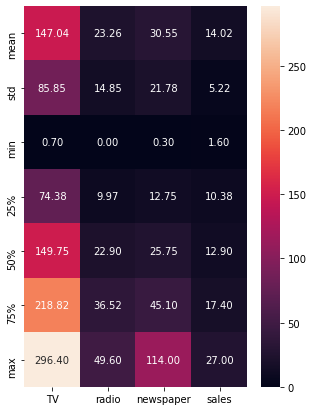

In [19]:
plt.figure(figsize=[5,7])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f')

The mean of the data is higher than the median for the columns ['radio','newspaper','sales']. That means skewness is present in these columns. Also the 75% and the maximum value of column 'newspaper' is having a much higher difference. That means there is possible outliers in the data.

### Correlation

In [21]:
Correlation = data.corr()
Correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

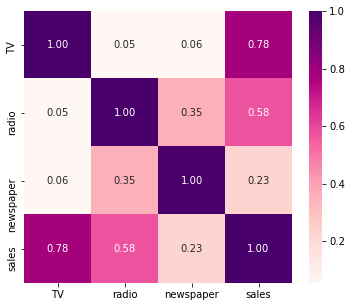

In [23]:
#Plotting the correlation of columns
plt.figure(figsize=[6,5])
sns.heatmap(Correlation,annot = True, fmt = '0.2f',cmap='RdPu')

All the columns have having positive correlation to each other. 

### Correlation with Target Column(sales)

TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64


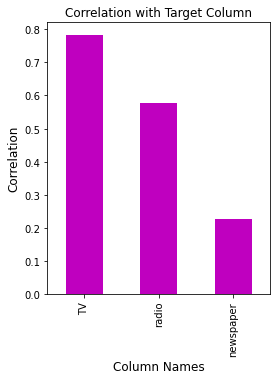

In [33]:
print(Correlation['sales'][:-1])
plt.figure(figsize = [4,5])
Correlation['sales'].sort_values(ascending=False).drop('sales').plot(kind='bar',color = 'm')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()


1. The column 'TV' is having highest correlation with the target variable - 78%.
2. The column 'newspaper' is having the lowest correlation with the target variable - 22.8%.
3. The column 'radio' is having a strong correlation bond with the target variable - 57.6%.

### Distribution of data in columns(Checking skewness of data)

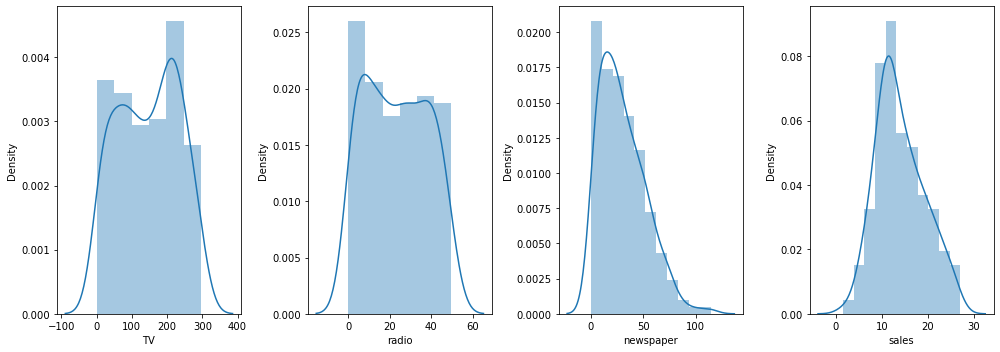

In [36]:
plt.figure(figsize = [14,5])
for i in range(0,len(data.columns.values)):
    plt.subplot(1,4,i+1)
    sns.distplot(data[data.columns.values[i]])
    plt.tight_layout()

The columns in the dataset are not normally distributed. There is skewness present in all the columns as per the above observations. High skewness is present in column 'newspaper'.

### Skewness

In [38]:
data.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

In the column ['TV','radio'] least skewness is present. High skewness is present in column 'newspaper'. Skewness is also present in the column 'sales', but we can ignore this column as it is the target column.

### Checking the presence of outliers

In [39]:
#User defined function to plot the outlers of each columns using boxplot
def box(col):
    plt.figure(figsize =[3,6])
    sns.boxplot(y = data[col])
    plt.show()

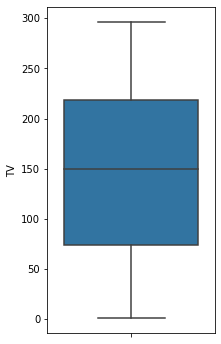

In [40]:
box('TV')

There is no outliers present in the data of column 'TV'.

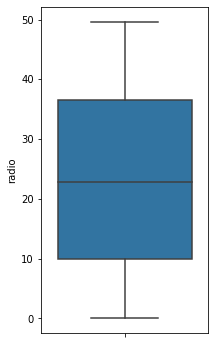

In [41]:
box('radio')

There is no outliers present in the data of column 'radio'.

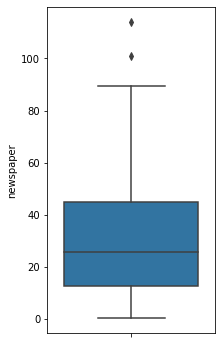

In [42]:
box('newspaper')

There are outliers present in the data of column 'newspaper'.

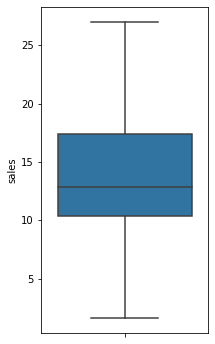

In [44]:
box('sales')

There are no outliers present in the data of target column 'sales'.

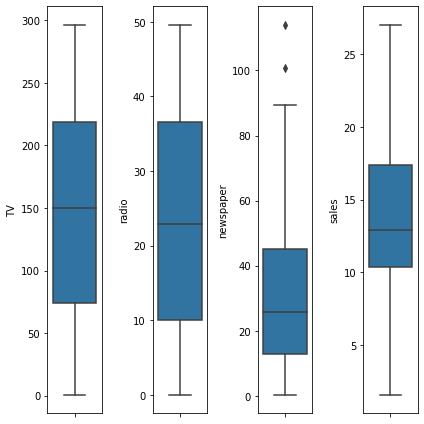

In [46]:
#Plotting the data of every columns with boxplot to check the outliers
plt.figure(figsize = [6,6])
for i in range(0,len(data.columns.values)):
    plt.subplot(1,4,i+1)
    sns.boxplot(y = data[data.columns.values[i]])
    plt.tight_layout()

Outliers are only present in the data of column 'newspaper' in the dataset.

### Splitting the data before removing skewness

In [47]:
x = data.drop(['sales'],axis = 1)
y = data.sales

In [48]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [58]:
#We are setting the standard limit for skewness as +/-0.4.
x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.4]

newspaper    0.89472
dtype: float64

Only the column newspaper is having higher skewness than the standard limit. Let's transform the column data to remove the skewness in column 'newspaper'.

In [59]:
from sklearn.preprocessing import power_transform
x['newspaper'] = power_transform(x['newspaper'].values.reshape(-1,1))

In [60]:
#Now we can validate whether the skewness is removed for the column
x.skew()

TV          -0.069853
radio        0.094175
newspaper   -0.077942
dtype: float64

The skewness of the column 'newspaper' is now removed.

### Removing Outliers

In [61]:
from scipy.stats import zscore
df = x.copy()
df['sales'] = y.copy()
z = np.abs(zscore(df))
z

array([[9.69852266e-01, 9.81522472e-01, 1.51433531e+00, 1.55205313e+00],
       [1.19737623e+00, 1.08280781e+00, 7.87682518e-01, 6.96046111e-01],
       [1.51615499e+00, 1.52846331e+00, 1.51699753e+00, 9.07405869e-01],
       [5.20496822e-02, 1.21785493e+00, 1.21465643e+00, 8.60330287e-01],
       [3.94182198e-01, 8.41613655e-01, 1.21170398e+00, 2.15683025e-01],
       [1.61540845e+00, 1.73103399e+00, 1.66502354e+00, 1.31091086e+00],
       [1.04557682e+00, 6.43904671e-01, 1.07753498e-01, 4.27042783e-01],
       [3.13436589e-01, 2.47406325e-01, 8.44093412e-01, 1.58039455e-01],
       [1.61657614e+00, 1.42906863e+00, 2.13259669e+00, 1.77205942e+00],
       [6.16042873e-01, 1.39530685e+00, 2.29003949e-01, 6.57617064e-01],
       [9.45155670e-01, 1.17923146e+00, 7.22615630e-02, 1.04190753e+00],
       [7.90028350e-01, 4.96973404e-02, 1.60261898e+00, 6.48970529e-01],
       [1.43908760e+00, 7.99208859e-01, 1.42512925e+00, 9.26620392e-01],
       [5.78501712e-01, 1.05768905e+00, 1.22982506e

In [62]:
threshold = 3
df_new = df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
Sl.No.,,,,
1,230.1,37.8,1.514335,22.1
2,44.5,39.3,0.787683,10.4
3,17.2,45.9,1.516998,9.3
4,151.5,41.3,1.214656,18.5
5,180.8,10.8,1.211704,12.9
...,...,...,...,...
196,38.2,3.7,-0.682576,7.6
197,94.2,4.9,-1.142011,9.7
198,177.0,9.3,-1.313050,12.8


In [63]:
df.shape

(200, 4)

In [65]:
df_new.shape

(200, 4)

After adjusting the skewness of the data in column newspaper, there are no outliers to be removed from the data. So we are not losing any data

### Checking the Multicolinearity of variables in the dataframe

In [66]:
x = df.drop('sales',axis = 1)
y = df.sales

print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [68]:
calc_vif(x)

,Column Name,VIF Factor
0,TV,2.289921
1,radio,2.351347
2,newspaper,1.051119


There is no much variance of inflation present in the columns in dataset. So our data is ready to proceed with further steps to build the model.

In [69]:
#Steps performed till now
#1.Loaded data
#2. Observed the type of data, features and target of dataset, shape of the dataset(rows and columns).
#3. Checked for missing values
#4. Data visualization 
    #Univariate analysis - Using histogram plot
    #Bivariate analysis(with target column) - Using scatter plot

# Statistical Summary
#5. Describe of the data
#6. Correlation of the data
#7. Correlation of columns with target variable
#8. Distribution of data in columns - Skewess
#9. Checking for outliers in data
#10. Removed skewness in columns after setting the standard limit as +/-0.4.
#11. Removed outliers(None was present after skewness was removed).
#12. Checked the Multicolinearity of variables

### EDA Completed

### Building the Model

### Splitting the data into features and target

In [70]:
features = x.copy()
target = y.copy()

In [71]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.linear_model import Lasso,Ridge,ElasticNet  #Reguralization technique

from sklearn.model_selection import train_test_split


In [73]:
lr = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(n_estimators=100)
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
estimator = [('LR', LinearRegression()),
             ('KNN',KNeighborsRegressor()),
             ('SVR', SVR(gamma='auto')),
             ('DTR',DecisionTreeRegressor()),
             ('RFR',RandomForestRegressor(n_estimators=100))]
vtr = VotingRegressor(estimators=estimator)

#### Finding the best random_state

In [74]:
#User defined function for finding the best random state
def best_ran(model):
    maxacc = 0
    maxrs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = r2_score(target_test,pred_test)
        if acc>maxacc:
            maxacc = acc
            maxrs = i
    print("At random state ", maxrs, 'the model is having r2 score of ', maxacc)

In [75]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    acc = r2_score(target_test,pred_test)
    mse = mean_squared_error(target_test,pred_test)
    mae = mean_absolute_error(target_test,pred_test)
    print("R2 score is ", acc)
    print("_"*50)
    print("Mean Sqaured Error is ",mse)
    print("_"*50)
    print("Mean Absolute Error is ",mae)
    print("_"*50)

#### LinearRegression

In [76]:
best_ran(lr)

LinearRegression()
At random state  92 the model is having r2 score of  0.9513210747921346


In [77]:
mod_test(lr,92)
print("Coefficent is ",lr.coef_)
print("_"*50)
print("Intercept is ",lr.intercept_)
print("_"*50)

LinearRegression()
R2 score is  0.9513210747921346
__________________________________________________
Mean Sqaured Error is  1.5035091494581527
__________________________________________________
Mean Absolute Error is  0.9442191134082922
__________________________________________________
Coefficent is  [0.04574448 0.18462495 0.07182418]
__________________________________________________
Intercept is  2.870859923041168
__________________________________________________


#### KNeighborsRegressor

In [78]:
best_ran(knn)

KNeighborsRegressor()
At random state  59 the model is having r2 score of  0.9819359552588437


In [79]:
mod_test(knn,59)

KNeighborsRegressor()
R2 score is  0.9819359552588437
__________________________________________________
Mean Sqaured Error is  0.4926100000000001
__________________________________________________
Mean Absolute Error is  0.49350000000000005
__________________________________________________


#### SVR

In [80]:
best_ran(svr)

SVR()
At random state  65 the model is having r2 score of  0.8947314810980579


In [84]:
mod_test(svr,65)

SVR()
R2 score is  0.8947314810980579
__________________________________________________
Mean Sqaured Error is  2.550169346094137
__________________________________________________
Mean Absolute Error is  1.1804076854457946
__________________________________________________


#### DecisionTreeRegressor

In [82]:
best_ran(dtr)

DecisionTreeRegressor()
At random state  20 the model is having r2 score of  0.9782263902781385


In [83]:
mod_test(dtr,20)

DecisionTreeRegressor()
R2 score is  0.9740056810331965
__________________________________________________
Mean Sqaured Error is  0.9407499999999998
__________________________________________________
Mean Absolute Error is  0.7575
__________________________________________________


#### RandomForestRegressor

In [85]:
best_ran(rfr)

RandomForestRegressor()
At random state  47 the model is having r2 score of  0.9897446688771164


In [86]:
mod_test(rfr,47)

RandomForestRegressor()
R2 score is  0.9897188805423577
__________________________________________________
Mean Sqaured Error is  0.28978562500000227
__________________________________________________
Mean Absolute Error is  0.43462500000000065
__________________________________________________


#### AdaBoostRegressor

In [87]:
best_ran(abr)

AdaBoostRegressor()
At random state  69 the model is having r2 score of  0.9747558512757389


In [89]:
mod_test(abr,69)

AdaBoostRegressor()
R2 score is  0.9688087472905447
__________________________________________________
Mean Sqaured Error is  0.865041827236363
__________________________________________________
Mean Absolute Error is  0.7792919934987061
__________________________________________________


#### GradientBoostingRegressor

In [88]:
best_ran(gbr)

GradientBoostingRegressor()
At random state  69 the model is having r2 score of  0.9910086578557963


In [90]:
mod_test(gbr,69)

GradientBoostingRegressor()
R2 score is  0.9910040237664303
__________________________________________________
Mean Sqaured Error is  0.2494896819743005
__________________________________________________
Mean Absolute Error is  0.38640922413830203
__________________________________________________


#### VotingRegressor

In [91]:
best_ran(vtr)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At random state  38 the model is having r2 score of  0.9499122846003326


In [92]:
mod_test(vtr,38)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
R2 score is  0.9501569107293886
__________________________________________________
Mean Sqaured Error is  0.8844207603266565
__________________________________________________
Mean Absolute Error is  0.7507077483562066
__________________________________________________


From the above observations, the ensemble method GradientBoosting Regressor(gbr) is performing well with R2 Score of 99.1% and mean squared error of 0.25 and mean absolute error of 0.39. Now we can cross validate the models to identify the model that performs well with cross validation.`

### Cross Validation

In [93]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,10):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

#### LinearRegression

In [94]:
cross_val(lr,92)

LinearRegression()
At cv fold 2  the cv score is  0.8917673193313229 and the R2 score  is  0.9513210747921346


#### KNeighborsRegressor

In [95]:
cross_val(knn,59)

KNeighborsRegressor()
At cv fold 9  the cv score is  0.9574638757447064 and the R2 score  is  0.9819359552588437


#### SVR

In [96]:
cross_val(svr,65)

SVR()
At cv fold 9  the cv score is  0.8479967537301291 and the R2 score  is  0.8947314810980579


#### DecisionTreeRegressor

In [97]:
cross_val(dtr,20)

DecisionTreeRegressor()
At cv fold 5  the cv score is  0.9567644784716574 and the R2 score  is  0.9759122534580803


#### RandomForestRegressor

In [98]:
cross_val(rfr,47)

RandomForestRegressor()
At cv fold 4  the cv score is  0.9782323455289749 and the R2 score  is  0.9899962486066427


#### AdaBoostRegressor

In [99]:
cross_val(abr,69)

AdaBoostRegressor()
At cv fold 6  the cv score is  0.9585603392028753 and the R2 score  is  0.9702546842287997


#### GradientBoostingRegressor

In [100]:
cross_val(gbr,69)

GradientBoostingRegressor()
At cv fold 8  the cv score is  0.9793482400496488 and the R2 score  is  0.9910060025909112


#### VotingRegressor

In [101]:
cross_val(vtr,38)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KNN', KNeighborsRegressor()),
                            ('SVR', SVR(gamma='auto')),
                            ('DTR', DecisionTreeRegressor()),
                            ('RFR', RandomForestRegressor())])
At cv fold 9  the cv score is  0.9185098684523731 and the R2 score  is  0.94775124606532


### After the cross validation of models, the Gradient Bossting Regressor is performing well with cross validation and providing the maximum R2 Score of 99.1% and cross validation mean score of 97.9%. So we can select this model as the best model and proceed with the further steps.

In [104]:
gbr = GradientBoostingRegressor()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 69)
gbr.fit(features_train, target_train)
pred_test = gbr.predict(features_test)

cv_score = cross_val_score(gbr,features, target, cv = 8)
cv_mean =cv_score.mean()
print("At cv fold",7," the cv score is ", cv_mean, "and the R2 score  is ",r2_score(target_test,pred_test))

At cv fold 7  the cv score is  0.9792964074639121 and the R2 score  is  0.9910049002416129


### Regularization

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001,0.001,0.01,0.1,1],'random_state':list(range(0,10))}

### Lasso(L1)

In [105]:
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [106]:
ls = Lasso(alpha = 1, random_state = 0)
ls.fit(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.9210594589378784

In [107]:
cross_val(ls,0)

Lasso(alpha=1, random_state=0)
At cv fold 2  the cv score is  0.8937014317149475 and the R2 score  is  0.8621911853715882


### Ridge(L2)

In [108]:
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [109]:
rd = Ridge(alpha = 1,random_state=0)
rd.fit(features_train,target_train)
pred_rd = rd.predict(features_test)

rds = r2_score(target_test,pred_rd)
rds

0.9225616210233731

In [110]:
cross_val(rd,0)

Ridge(alpha=1, random_state=0)
At cv fold 2  the cv score is  0.8918076973756942 and the R2 score  is  0.8598421388582057


### ElasticNet

In [111]:
en = ElasticNet()
clf = GridSearchCV(en,parameters)
clf.fit(features_train, target_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [112]:
en = ElasticNet(alpha = 1, random_state = 0)
en.fit(features_train,target_train)
pred_en = en.predict(features_test)

ens = r2_score(target_test,pred_en)
ens

0.9223924610201923

In [113]:
cross_val(en,0)

ElasticNet(alpha=1, random_state=0)
At cv fold 2  the cv score is  0.8939560799403214 and the R2 score  is  0.861559425785135


The regularization techniques didn't provide much better results. So we can stick to the Gradient Boosting Regressor(gbr) model since it is performing well with all the tests.

### Hyper Parameter Tuning

In [117]:
parameters = {'loss':['squared_error', 'absolute_error','huber','quantile'],
             'learning_rate':[0.1,0.2,0.3],
             'n_estimators' : [100,200],
             'criterion':['friedman_mse', 'squared_error','mae']}
grid = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=parameters,cv = 8)

In [118]:
grid.fit(features,target)
grid.best_score_

0.9799382455690824

In [116]:
grid.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'huber',
 'n_estimators': 200}

In [119]:
gbr = GradientBoostingRegressor(criterion = 'squared_error',learning_rate= 0.1,loss= 'huber',n_estimators=200)
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 69)
gbr.fit(features_train, target_train)
pred_test = gbr.predict(features_test)

print('R2 Score',r2_score(target_test,pred_test))
print('Mean Squared Error',mean_squared_error(target_test,pred_test))
print('Mean Absolute Error',mean_absolute_error(target_test,pred_test))

R2 Score 0.9913110743789312
Mean Squared Error 0.24097410148877296
Mean Absolute Error 0.387654315089219


In [120]:
cross_val(gbr,69)

GradientBoostingRegressor(criterion='squared_error', loss='huber',
                          n_estimators=200)
At cv fold 6  the cv score is  0.9786908107709338 and the R2 score  is  0.9912868678465299


The R2 Score have been slightly improved with hyper parameter tuning.

### After all the tests and tunings, our model gbr() is performing good with R2 Score of 99.13% with a mean squared error of 0.24 and mean absolute error of 0.39 with GradientBoostingRegressor Algorithm.

### Conclusion

In [121]:
import pickle
filename = 'Advertising Sales Channel Prediction Model.pkl'
pickle.dump(gbr,open(filename,'wb'))

In [127]:
original = np.array(target_test)
predicted = np.round(np.array(gbr.predict(features_test)),2)

prediction_test = pd.DataFrame({'Original Value (sales)':original,'Predicted Value (sales)':predicted})
prediction_test.sample(20)

,Original Value (sales),Predicted Value (sales)
2,11.8,12.04
25,19.4,19.53
28,23.8,22.98
20,12.3,12.57
30,18.4,19.02
6,10.6,10.32
11,15.7,15.24
36,12.5,12.53
14,15.5,15.53
4,12.0,11.88


### We were able to predict the total sales generated from advertising through channels such as 'TV','radio' and 'newspaper' with an accuracy(R2 score) of 99.13%. Our model is performing well with the predictions. 